In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pyprojroot import here

goemotions = pd.read_feather(here("data/goemotions.feather"))
decoded = pd.read_feather(here(r"data/goemotions_decoded.feather"))
decoded.head(10)

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1.0,False,[sadness]
1,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37.0,True,[]
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37.0,False,[neutral]
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18.0,False,[love]
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546669e+09,2.0,False,[neutral]
5,Right? Considering it’s such an important docu...,eespn2i,ImperialBoss,TrueReddit,t3_aizyuz,t1_eesoak0,1.548280e+09,61.0,False,[gratitude]
6,"He isn't as big, but he's still quite popular....",eczuekb,Rallings,cringe,t3_abeksv,t1_eczsmp8,1.546320e+09,3.0,False,[disapproval]
7,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,1.546536e+09,23.0,False,[amusement]
8,that's adorable asf,ef961hv,RedRails1917,traaaaaaannnnnnnnnns,t3_akz2ia,t3_akz2ia,1.548764e+09,73.0,False,[amusement]
9,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",edl7cr3,Tiagulus,youtubehaiku,t3_acuvb0,t1_edc21ip,1.546984e+09,54.0,False,[amusement]


In [2]:
decoded.shape

(211225, 10)

In [ ]:
decoded['created_utc'] = pd.to_datetime(decoded['created_utc'], unit='s')
decoded

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1.0,False,[sadness]
1,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37.0,True,[]
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37.0,False,[neutral]
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18.0,False,[love]
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2.0,False,[neutral]
...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,2019-01-16 10:25:22,16.0,False,[love]
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,2019-01-27 01:39:42,15.0,False,[caring]
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,2019-01-17 00:08:54,70.0,False,[admiration]
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,2019-01-11 01:07:12,4.0,False,[anger]


## Basic statistical overview

In [4]:
decoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   text                  211225 non-null  object        
 1   id                    211225 non-null  object        
 2   author                211225 non-null  object        
 3   subreddit             211225 non-null  object        
 4   link_id               211225 non-null  object        
 5   parent_id             211225 non-null  object        
 6   created_utc           211225 non-null  datetime64[ns]
 7   rater_id              211225 non-null  float64       
 8   example_very_unclear  211225 non-null  bool          
 9   decoded               211225 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(7)
memory usage: 14.7+ MB


### Basic stats on text length

In [5]:
decoded['text_length'] = decoded['text'].apply(len)
print("\nBasic Statistical Overview of Text Length:")
print(decoded['text_length'].describe())


Basic Statistical Overview of Text Length:
count    211225.000000
mean         69.236785
std          36.507377
min           2.000000
25%          39.000000
50%          66.000000
75%          96.000000
max         703.000000
Name: text_length, dtype: float64


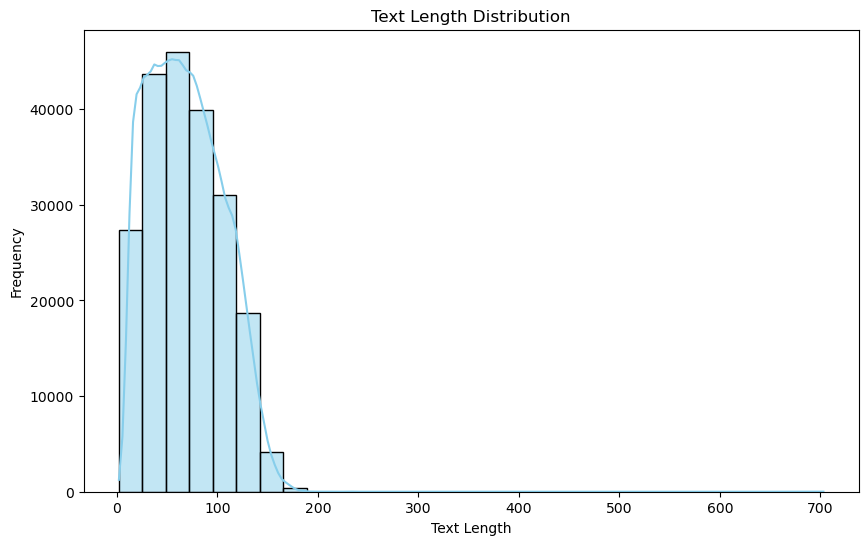

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(decoded['text_length'], kde=True, bins=30, color='skyblue')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Filter rows where 'text_length' is less than 6
short_text_rows = decoded[decoded['text_length'] < 6]

short_text_rows

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
3159,Fuck,edpz0mi,MikeyTheDinosaur,HighQualityGifs,t3_aejs1b,t1_edpyjly,2019-01-10 16:36:13,3.0,False,"[annoyance, disgust]",4
6014,Emo!!,ef0ypia,MarleyMawfucka,Jokes,t3_ak13e0,t3_ak13e0,2019-01-26 17:17:38,46.0,False,[neutral],5
6664,:^),ed10w2o,tricksandtreachery,CFB,t3_abknf4,t3_abknf4,2019-01-01 19:17:03,37.0,True,[],3
8245,Enjoy,ee083h0,skittles_rainbows,Teachers,t3_afm8mf,t1_edzwp2r,2019-01-13 21:45:04,39.0,False,[neutral],5
9194,OMG!!,edr0ryr,lodobol,instant_regret,t3_aek2tw,t3_aek2tw,2019-01-10 22:06:19,52.0,False,[surprise],5
...,...,...,...,...,...,...,...,...,...,...,...
205099,No.,eff0umz,TheLonelySnail,Advice,t3_alhxrd,t3_alhxrd,2019-01-31 04:40:17,4.0,False,[neutral],3
207233,Emo!!,ef0ypia,MarleyMawfucka,Jokes,t3_ak13e0,t3_ak13e0,2019-01-26 17:17:38,42.0,False,"[disappointment, sadness]",5
207920,LCSC?,eff3zwi,rockwood7,PandR,t3_alkh0i,t1_eff10pp,2019-01-31 05:32:48,54.0,False,[neutral],5
209093,B E N,edglk7r,Cyber_Connor,gatekeeping,t3_addblf,t3_addblf,2019-01-07 09:56:36,66.0,False,[neutral],5


Insight: we also have emodjies like: :^), id: ed10w2o, and exclamations like "oh no"

In [8]:
# Filter rows where 'text_length' is less than 6
super_short_text_rows = decoded[decoded['text_length'] < 4]

super_short_text_rows

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
6664,:^),ed10w2o,tricksandtreachery,CFB,t3_abknf4,t3_abknf4,2019-01-01 19:17:03,37.0,True,[],3
11228,Yes,edye6sw,survivorphoto,BigBrother,t3_a0zcd6,t1_edyd1re,2019-01-13 05:45:25,61.0,True,[],3
11806,art,eeoll7y,Eat_Animals,ATBGE,t3_aifpwq,t1_eeo6cc4,2019-01-22 10:45:15,49.0,False,[neutral],3
16910,(:),edkjb9g,EMORAP,Roadcam,t3_adu8rg,t3_adu8rg,2019-01-08 16:55:02,16.0,False,[neutral],3
20020,:^(,ed2o064,BelialLedah,chelseafc,t3_absiob,t3_absiob,2019-01-02 12:05:16,26.0,False,[neutral],3
26790,(:),edkjb9g,EMORAP,Roadcam,t3_adu8rg,t3_adu8rg,2019-01-08 16:55:02,42.0,True,[],3
45687,Yes,edye6sw,survivorphoto,BigBrother,t3_a0zcd6,t1_edyd1re,2019-01-13 05:45:25,46.0,False,[neutral],3
66808,:((,eerg0xa,badmemss,traaaaaaannnnnnnnnns,t3_aiyhw1,t3_aiyhw1,2019-01-23 12:30:50,30.0,False,[neutral],3
85602,:^),ed10w2o,tricksandtreachery,CFB,t3_abknf4,t3_abknf4,2019-01-01 19:17:03,3.0,True,[],3
87838,:^),ed10w2o,tricksandtreachery,CFB,t3_abknf4,t3_abknf4,2019-01-01 19:17:03,72.0,True,[],3


More emodjies!

### Duplicates

In [9]:
duplicates = decoded[decoded['link_id'].duplicated(keep=False)]

duplicates

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1.0,False,[sadness],15
1,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37.0,True,[],125
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37.0,False,[neutral],46
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18.0,False,[love],18
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,2019-01-05 06:10:01,2.0,False,[neutral],51
...,...,...,...,...,...,...,...,...,...,...,...
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,2019-01-16 10:25:22,16.0,False,[love],22
211221,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,2019-01-27 01:39:42,15.0,False,[caring],88
211222,That looks amazing,ee8hse1,springt1me,shittyfoodporn,t3_agrnqb,t3_agrnqb,2019-01-17 00:08:54,70.0,False,[admiration],18
211223,The FDA has plenty to criticize. But like here...,edrhoxh,enamedata,medicine,t3_aejqzd,t1_edrgdtx,2019-01-11 01:07:12,4.0,False,[anger],147


In [10]:
# Count the number of duplicated rows in 'cleaned_text' column
duplicate_count = decoded['text'].duplicated(keep=False).sum()

print(f"Number of duplicated rows in 'text': {duplicate_count}")

Number of duplicated rows in 'text': 211156


In [11]:
matching_rows = decoded[decoded['id'] == 'ed5tx8y']

matching_rows

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
7,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,2019-01-03 17:22:38,23.0,False,[amusement],131
8027,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,2019-01-03 17:22:38,50.0,False,[joy],131
12512,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,2019-01-03 17:22:38,62.0,False,[neutral],131
81342,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,2019-01-03 17:22:38,42.0,False,"[approval, realization]",131
134558,That's crazy; I went to a super [RELIGION] hig...,ed5tx8y,Beachy5313,TeenMomOGandTeenMom2,t3_ac10u9,t1_ed5tfyc,2019-01-03 17:22:38,60.0,False,[surprise],131


In [12]:
matching_rows = decoded[decoded['text'] == 'That game hurt.']

matching_rows

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1.0,False,[sadness],15
11947,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,72.0,False,[remorse],15
45274,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,52.0,False,[sadness],15
129293,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,20.0,False,[disappointment],15
156312,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,26.0,False,[neutral],15


same rater, same text, different emotion ?!??!?!

In [13]:
matching_rows = decoded[decoded['link_id'] == 't3_agjf24']

matching_rows

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
211095,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,2019-01-16 10:25:22,57.0,False,[love],22
211220,Everyone likes [NAME].,ee6pagw,Senshado,heroesofthestorm,t3_agjf24,t3_agjf24,2019-01-16 10:25:22,16.0,False,[love],22


different rater. shall we filter those ourselves and choose the better rates opinion??

In [14]:
matching_rows = decoded[decoded['text'] == 'Man I love reddit.']

matching_rows

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18.0,False,[love],18
67622,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,81.0,False,[love],18
80939,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,24.0,False,[love],18
171206,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,2.0,False,[love],18
190463,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,37.0,False,[admiration],18


In [15]:
second_text = decoded.iloc[1]['text']
second_text

'>sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of "grouping"'

In [16]:
matching_rows = decoded[decoded['text'] == '>sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of "grouping"']

matching_rows

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
1,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37.0,True,[],125
78116,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,61.0,True,[],125
90121,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,7.0,False,[optimism],125
160913,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,36.0,False,[disapproval],125
175893,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,27.0,False,[neutral],125


In [17]:
# Group by 'uniqueid' and count unique 'raters_id' per group
rater_counts = decoded.groupby('id')['rater_id'].nunique()

rater_counts

id
eczazk6    2
eczb07q    2
eczb4bm    3
eczb527    3
eczb6r7    5
          ..
efhclgb    3
efhcm78    5
efhcnhz    3
efhcreo    3
efhcuxi    3
Name: rater_id, Length: 58011, dtype: int64

Conclustions till now: when example_very_unclear TRUE add a lable "neutral".

In [18]:
# Count the number of duplicated rows in the 'text' column
duplicate_count = decoded['text'].duplicated(keep=False).sum()

print(f"Number of duplicated rows in 'text': {duplicate_count}")

Number of duplicated rows in 'text': 211156


In [19]:
# Count of unique rows based on 'text' only
unique_text_count = decoded['text'].nunique()

print(f"Number of unique 'text' entries: {unique_text_count}")

Number of unique 'text' entries: 57731


In [20]:
# Count occurrences of each text
text_counts = decoded['text'].value_counts()

# Filter for texts that appear more than 5 times
frequent_duplicates = text_counts[text_counts > 3]

frequent_duplicates

text
Thank you.                                                                                                   45
Thank you!                                                                                                   35
Happy cake day!                                                                                              29
[NAME].                                                                                                      25
Weird flex but ok                                                                                            25
                                                                                                             ..
>not a cure-all. Since we don't have such a thing, is this not the next best option?                          4
I’m glad he’s okay but I’m even gladder it’s not that same gif of the guy ski/parachuting down a mountain     4
Looks like she's saying that just to be nice imo                                                   

In [21]:
decoded_duplicates = decoded[decoded['text'].isin(frequent_duplicates.index)]

decoded_duplicates

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,2019-01-25 01:50:39,1.0,False,[sadness],15
1,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37.0,True,[],125
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,2019-01-02 11:15:44,37.0,False,[neutral],46
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,2019-01-20 06:17:34,18.0,False,[love],18
6,"He isn't as big, but he's still quite popular....",eczuekb,Rallings,cringe,t3_abeksv,t1_eczsmp8,2019-01-01 05:21:16,3.0,False,[disapproval],115
...,...,...,...,...,...,...,...,...,...,...,...
210827,Who's [NAME]?,ef4vane,Mr_Kwijibo,TheSimpsons,t3_ak9nu6,t1_ef4v8b5,2019-01-28 00:20:02,7.0,False,[confusion],13
210900,"Careful, he's a hero",eeyqc65,Noir24,reactiongifs,t3_ajk93r,t1_eexdfiv,2019-01-25 21:44:47,2.0,False,[caring],20
211052,Who's [NAME]?,ef4vane,Mr_Kwijibo,TheSimpsons,t3_ak9nu6,t1_ef4v8b5,2019-01-28 00:20:02,41.0,False,[neutral],13
211100,"Careful, he's a hero",eeyqc65,Noir24,reactiongifs,t3_ajk93r,t1_eexdfiv,2019-01-25 21:44:47,33.0,False,[neutral],20


### Checking for missing values per column

In [22]:
print("\nMissing Values in Each Column:")
print(decoded.isnull().sum())


Missing Values in Each Column:
text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
decoded                 0
text_length             0
dtype: int64


In [23]:
unclear_rows = decoded[decoded['example_very_unclear'] == True]
unclear_rows

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
1,>sexuality shouldn’t be a grouping category It...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,2019-01-21 15:22:49,37.0,True,[],125
62,Oi us cancers don’t want him either! We respec...,ee0ai3t,schwiftypants39,Justfuckmyshitup,t3_afgkgb,t1_edzkirq,2019-01-13 22:13:56,22.0,True,[],79
195,I unfortunately can not afford a lawyer. Lucki...,ed0rtl7,Renissancelady,Divorce,t3_abjqns,t1_ed0rm5b,2019-01-01 17:28:15,12.0,True,[],94
262,OMG THOSE TINY SHOES! *desire to boop snoot in...,eei8tja,I_69_WITH_DOGS,chicago,t3_ahu4m4,t3_ahu4m4,2019-01-20 05:36:33,61.0,True,[],56
264,I would pay money for [NAME] to not be my nurs...,ee8zjas,-Azwel-,SoulCalibur,t3_agt3qw,t3_agt3qw,2019-01-17 03:50:29,22.0,True,[],111
...,...,...,...,...,...,...,...,...,...,...,...
211037,_____ is ruining _____ because kids these days.,edrbjwb,LeastCoordinatedJedi,moviescirclejerk,t3_aejtjn,t1_edqe5al,2019-01-10 23:51:59,57.0,True,[],47
211082,"yea I agree, and [NAME] is way younger so has ...",ed99rjp,DukeofPoundtown,Dodgers,t3_ackdki,t1_ed98zg9,2019-01-04 22:09:22,37.0,True,[],124
211113,"Huh, assumed he was more of a grindr fella .....",efecc3d,Supreme_Dear_Leader,90dayfianceuncensored,t3_alicxq,t3_alicxq,2019-01-30 23:05:53,61.0,True,[],48
211214,Well when you’ve imported about a gazillion of...,ef28nod,5inchloser,nottheonion,t3_ak26t3,t3_ak26t3,2019-01-27 01:39:42,61.0,True,[],88


In [24]:
import pandas as pd
import numpy as np

# Count rows with 'example_very_unclear' == True and False
true_count = decoded[decoded['example_very_unclear'] == True].shape[0]
false_count = decoded[decoded['example_very_unclear'] == False].shape[0]

print(f"Count of rows with 'example_very_unclear' = True: {true_count}")
print(f"Count of rows with 'example_very_unclear' = False: {false_count}")

# Count empty NumPy arrays in the 'decoded' column
empty_array_count = decoded[decoded['decoded'].apply(lambda x: isinstance(x, np.ndarray) and x.size == 0)].shape[0]
print(f"Count of rows where 'decoded' is an empty NumPy array: {empty_array_count}")

# Count empty arrays for rows where 'example_very_unclear' is True
empty_array_true_count = decoded[(decoded['example_very_unclear'] == True) & 
                                 (decoded['decoded'].apply(lambda x: isinstance(x, np.ndarray) and x.size == 0))].shape[0]

# Count empty arrays for rows where 'example_very_unclear' is False
empty_array_false_count = decoded[(decoded['example_very_unclear'] == False) & 
                                  (decoded['decoded'].apply(lambda x: isinstance(x, np.ndarray) and x.size == 0))].shape[0]

print(f"Count of empty NumPy arrays where 'example_very_unclear' = True: {empty_array_true_count}")
print(f"Count of empty NumPy arrays where 'example_very_unclear' = False: {empty_array_false_count}")


Count of rows with 'example_very_unclear' = True: 3411
Count of rows with 'example_very_unclear' = False: 207814
Count of rows where 'decoded' is an empty NumPy array: 3411
Count of empty NumPy arrays where 'example_very_unclear' = True: 3411
Count of empty NumPy arrays where 'example_very_unclear' = False: 0


=> all the example_very_unclear True are the only rows with no emotion attached.

## Explore the authors

In [25]:
decoded.author.value_counts()

author
[deleted]          3882
CakeDay--Bot         96
devildriver77        74
Ahren_with_an_h      57
saturdeity           57
                   ... 
YTZerri               1
ArritzJPC96           1
imawin                1
ZZ9119                1
Echelon906            1
Name: count, Length: 49178, dtype: int64

In [26]:
decoded[decoded['author'] == '[deleted]']

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
10,"I have, and now that you mention it, I think t...",ed9w1hm,[deleted],AskMenOver30,t3_acm7f6,t1_ed9m2l0,2019-01-05 03:17:43,36.0,False,[neutral],80
14,Build a wall? /jk,edsqvyx,[deleted],AskMenOver30,t3_aeq3ep,t1_edsn1bd,2019-01-11 11:51:59,10.0,False,[neutral],17
92,I didn't like the family ending but I liked th...,ee6mb6z,[deleted],assassinscreed,t3_agboi2,t1_ee6m488,2019-01-16 08:53:51,56.0,False,[approval],125
107,My fans on patreon will be rewarded soon,ef8s6ku,[deleted],nrl,t3_akwycz,t1_ef8pvmo,2019-01-29 07:24:40,33.0,False,[neutral],40
161,"Integrated, Antwaarps speaking, second generat...",eepltiz,[deleted],belgium,t3_ai8u8j,t1_eem1uan,2019-01-22 19:06:48,34.0,False,[disgust],101
...,...,...,...,...,...,...,...,...,...,...,...
210815,This post is inappropriate for this subreddit.,edau7nd,[deleted],SubredditDrama,t3_acuh2o,t3_acuh2o,2019-01-05 14:31:54,39.0,False,"[annoyance, disapproval]",46
210886,This post is inappropriate for this subreddit.,edau7nd,[deleted],SubredditDrama,t3_acuh2o,t3_acuh2o,2019-01-05 14:31:54,26.0,False,[disapproval],46
210899,This post is inappropriate for this subreddit.,edau7nd,[deleted],SubredditDrama,t3_acuh2o,t3_acuh2o,2019-01-05 14:31:54,37.0,False,[realization],46
210934,Fcking disgusting.,edwux5m,[deleted],COMPLETEANARCHY,t3_af8jgr,t3_af8jgr,2019-01-12 18:55:48,35.0,False,[disgust],18


### Explore chatbots

In [27]:
decoded[decoded['author'] == 'CakeDay--Bot']

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
3747,*Hey just noticed..* it's your **2nd Cakeday**...,eez8dxh,CakeDay--Bot,loveafterlockup,t3_ajvfmi,t1_eez3w06,2019-01-26 01:16:59,20.0,False,[neutral],61
5616,*Hey just noticed..* it's your **2nd Cakeday**...,ef6dqtg,CakeDay--Bot,sadcringe,t3_akh7do,t1_ef5akx4,2019-01-28 15:01:26,24.0,False,[neutral],74
7717,*Hey just noticed..* it's your **2nd Cakeday**...,ef6dqtg,CakeDay--Bot,sadcringe,t3_akh7do,t1_ef5akx4,2019-01-28 15:01:26,5.0,False,"[excitement, joy]",74
12073,*Hey just noticed..* it's your **5th Cakeday**...,ef4ypl3,CakeDay--Bot,DevilMayCry,t3_akd36x,t1_ef4ha42,2019-01-28 01:00:18,56.0,False,[joy],65
15678,*Hey just noticed..* it's your **4th Cakeday**...,ees7l5w,CakeDay--Bot,rpghorrorstories,t3_aitycw,t1_ees7ht7,2019-01-23 18:28:55,21.0,False,[excitement],62
...,...,...,...,...,...,...,...,...,...,...,...
202915,*Hey just noticed..* it's your **1st Cakeday**...,eew3zxy,CakeDay--Bot,forhonor,t3_ajfz47,t1_eevotvn,2019-01-25 01:30:29,4.0,False,[joy],67
203231,*Hey just noticed..* it's your **7th Cakeday**...,eezfh6m,CakeDay--Bot,justneckbeardthings,t3_ajiw2z,t1_eewu8ju,2019-01-26 02:51:01,67.0,False,[joy],60
206254,*Hey just noticed..* it's your **1st Cakeday**...,efgm2no,CakeDay--Bot,seduction,t3_aliakl,t1_efe8n39,2019-01-31 18:36:29,34.0,False,[love],69
207977,*Hey just noticed..* it's your **4th Cakeday**...,ees7l5w,CakeDay--Bot,rpghorrorstories,t3_aitycw,t1_ees7ht7,2019-01-23 18:28:55,55.0,False,[love],62


In [28]:
decoded[decoded['author'].str.contains('BOT', case=False, na=False)][['text', 'author']]

,text,author
206,Go play Farmville if you can't keep it up.,Botdabottt
290,"TAKE ME TO YOUR CRYPT, I WANT TO PAY MY RESPECTS!",bobby-b-bot
600,At least it made for hilarious responses by pe...,botoks
1082,"Wait, did this really happen? I'd like to see ...",refreshbot
1687,You can be highly educated and still incredibl...,russiabot1776
...,...,...
211057,"If you ram it just right, you can ram it all n...",Notarobot_probably
211132,"If you ram it just right, you can ram it all n...",Notarobot_probably
211154,"If you ram it just right, you can ram it all n...",Notarobot_probably
211191,"Less next gen gaming, more deliberately stupid...",bottomofleith


In [29]:
decoded[decoded['author'] == 'HelperBot_']

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
3374,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ed35hh8,HelperBot_,syriancivilwar,t3_abutrs,t1_ed35h1p,2019-01-02 17:04:52,26.0,False,[neutral],75
7772,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ee1cgxj,HelperBot_,perth,t3_afpylb,t1_ee1cgp4,2019-01-14 08:41:06,37.0,True,[],75
13957,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ed35hh8,HelperBot_,syriancivilwar,t3_abutrs,t1_ed35h1p,2019-01-02 17:04:52,15.0,False,[neutral],75
50186,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ed35hh8,HelperBot_,syriancivilwar,t3_abutrs,t1_ed35h1p,2019-01-02 17:04:52,49.0,False,[neutral],75
69525,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ee0rgnv,HelperBot_,UpliftingNews,t3_af9v02,t1_ee0rgkj,2019-01-14 01:58:38,8.0,False,[neutral],75
107137,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ee0rgnv,HelperBot_,UpliftingNews,t3_af9v02,t1_ee0rgkj,2019-01-14 01:58:38,57.0,True,[],75
112759,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ee1cgxj,HelperBot_,perth,t3_afpylb,t1_ee1cgp4,2019-01-14 08:41:06,24.0,False,[neutral],75
127520,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ee0rgnv,HelperBot_,UpliftingNews,t3_af9v02,t1_ee0rgkj,2019-01-14 01:58:38,2.0,True,[],75
153601,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ee0rgnv,HelperBot_,UpliftingNews,t3_af9v02,t1_ee0rgkj,2019-01-14 01:58:38,4.0,False,[neutral],75
163611,Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...,ee0rgnv,HelperBot_,UpliftingNews,t3_af9v02,t1_ee0rgkj,2019-01-14 01:58:38,39.0,False,[neutral],75


In [30]:
decoded[decoded['author'] == 'Notarobot_probably'] ## Not a bot!

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
211057,"If you ram it just right, you can ram it all n...",eesvfqs,Notarobot_probably,nyjets,t3_aihyp3,t3_aihyp3,2019-01-23 22:56:24,23.0,False,[neutral],51
211132,"If you ram it just right, you can ram it all n...",eesvfqs,Notarobot_probably,nyjets,t3_aihyp3,t3_aihyp3,2019-01-23 22:56:24,15.0,False,[caring],51
211154,"If you ram it just right, you can ram it all n...",eesvfqs,Notarobot_probably,nyjets,t3_aihyp3,t3_aihyp3,2019-01-23 22:56:24,42.0,False,[approval],51


In [31]:
decoded[decoded['author'] == 'cheers_im_drunk_bot']

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
5114,"Cheers, [NAME]!",ef9fae1,cheers_im_drunk_bot,drunk,t3_akv19q,t1_ef9f90w,2019-01-29 14:07:16,24.0,False,[neutral],15
20879,"Cheers, [NAME]!",ef2t6nl,cheers_im_drunk_bot,drunk,t3_ak7p8q,t1_ef2t5lg,2019-01-27 06:24:29,12.0,False,[joy],15
24453,"Cheers, sololander!",eex7fm9,cheers_im_drunk_bot,drunk,t3_ajofu6,t1_eex7f1j,2019-01-25 12:46:40,33.0,False,[neutral],19
63465,"Cheers, sololander!",eex7fm9,cheers_im_drunk_bot,drunk,t3_ajofu6,t1_eex7f1j,2019-01-25 12:46:40,61.0,False,"[admiration, excitement]",19
71327,"Cheers, [NAME]!",ef9fae1,cheers_im_drunk_bot,drunk,t3_akv19q,t1_ef9f90w,2019-01-29 14:07:16,74.0,False,[neutral],15
91386,"Cheers, sololander!",eex7fm9,cheers_im_drunk_bot,drunk,t3_ajofu6,t1_eex7f1j,2019-01-25 12:46:40,46.0,False,[neutral],19
95060,"Cheers, [NAME]!",ef2t6nl,cheers_im_drunk_bot,drunk,t3_ak7p8q,t1_ef2t5lg,2019-01-27 06:24:29,24.0,False,[neutral],15
142426,"Cheers, [NAME]!",ef9fae1,cheers_im_drunk_bot,drunk,t3_akv19q,t1_ef9f90w,2019-01-29 14:07:16,51.0,False,[excitement],15
167797,"Cheers, [NAME]!",eezvyc1,cheers_im_drunk_bot,drunk,t3_ajybfs,t1_eezvxzg,2019-01-26 06:53:10,55.0,False,[joy],15
169660,"Cheers, [NAME]!",eezvyc1,cheers_im_drunk_bot,drunk,t3_ajybfs,t1_eezvxzg,2019-01-26 06:53:10,34.0,False,[neutral],15


some names are not masked "Cheers, sololander!"

In [32]:
decoded[decoded['author'] == 'BeepityBot']

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
9050,How dare you,eerl1p4,BeepityBot,danganronpa,t3_aiydmp,t1_eerh57r,2019-01-23 13:57:48,49.0,False,[anger],12
59068,How dare you,eerl1p4,BeepityBot,danganronpa,t3_aiydmp,t1_eerh57r,2019-01-23 13:57:48,51.0,False,[anger],12
198458,How dare you,eerl1p4,BeepityBot,danganronpa,t3_aiydmp,t1_eerh57r,2019-01-23 13:57:48,46.0,False,[annoyance],12


To Do
Check comments  with mutiple emotions.

In [33]:
# Filter rows where 'decoded' has more than one element
multi_decoded = decoded[decoded['decoded'].apply(lambda x: isinstance(x, np.ndarray) and len(x) > 8)]

multi_decoded

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
22266,American democracy is weak but it's not dead. ...,eek84mm,dysGOPia,The_Mueller,t3_ahynj9,t1_eek0ue6,2019-01-20 20:05:57,31.0,False,"[annoyance, disappointment, disgust, embarrass...",141
54430,Despite how much the Liberals and NDP apparent...,eeqmqtv,xxkachoxx,canada,t3_ait62x,t1_eeqlla2,2019-01-23 02:29:00,31.0,False,"[admiration, anger, caring, confusion, desire,...",99
71086,"Sadly, he seems immune to bans. He also dodges...",ee6ewou,Landotavius,SeattleWA,t3_ag6l8w,t1_ee5xsma,2019-01-16 05:54:17,31.0,False,"[admiration, anger, caring, desire, disappoint...",73
108471,At least you should have helped out since you ...,edzetty,flaresolar37,tifu,t3_afflns,t3_afflns,2019-01-13 16:40:55,31.0,False,"[admiration, anger, caring, curiosity, disgust...",73
151880,Two or three anti depressants before I told th...,edelx9y,Bluechimp1,benzodiazepines,t3_acxq4h,t1_ede5mxn,2019-01-06 19:07:42,31.0,False,"[admiration, approval, curiosity, disappointme...",101


In [34]:
decoded[decoded['rater_id'] == 31.0]

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,decoded,text_length
328,"""Sponge Blurb Pubs Quaw Haha GURR ha AAa!"" fin...",edl7cr3,Tiagulus,youtubehaiku,t3_acuvb0,t1_edc21ip,2019-01-08 21:38:34,31.0,False,[amusement],61
1492,I have no confidence to boost,edmsj1l,Sexually_Undesireabl,IncelsWithoutHate,t3_ad3sj3,t1_edmr50a,2019-01-09 13:50:10,31.0,False,"[disappointment, embarrassment, nervousness, s...",29
1602,[NAME] at 2.38 against Moicano seems like exce...,eeuoi4u,MavGore,MMA,t3_aj8ju4,t3_aj8ju4,2019-01-24 16:09:23,31.0,False,"[admiration, desire, excitement, gratitude, lo...",64
2270,Theres the link I use you stupid fuck get the ...,efgnl8l,adamradabaugh,darknet,t3_alqsg8,t1_efgnk9j,2019-01-31 18:52:17,31.0,False,"[anger, disgust, embarrassment]",80
2825,Your hairline is further away than [NAME] hope...,edksa1d,maxhalden11,RoastMe,t3_adj6yp,t3_adj6yp,2019-01-08 18:40:04,31.0,False,[neutral],103
...,...,...,...,...,...,...,...,...,...,...,...
209843,Have a good good upvote!,ed99lqd,Feverel,PandR,t3_acj7uq,t1_ed91996,2019-01-04 22:07:18,31.0,False,"[gratitude, optimism, pride]",24
210274,Please tell me the area of NYC that is like th...,eesggpv,coys66,vancouver,t3_aivt5q,t1_ees5t79,2019-01-23 20:07:43,31.0,False,[curiosity],64
210413,They look like rappers,eej72wr,theSpecialbro,WhitePeopleTwitter,t3_ahq2gu,t1_eeh892z,2019-01-20 14:16:41,31.0,False,[neutral],22
210583,Hey I’m going to eli today! Unfortunately for ...,edboesd,Lanko-TWB,minnesota,t3_acuy0x,t3_acuy0x,2019-01-05 20:10:54,31.0,False,"[disgust, nervousness, realization, surprise]",77


This rater overly lables a comment even with contradicting lables, because of that we decide to remove this rater and be awear that there could be more with a similar work.

to do
analyze the time period created_utc

In [35]:
from nltk.tokenize import word_tokenize
word_tokenize(decoded["text"][1])

['>',
 'sexuality',
 'shouldn',
 '’',
 't',
 'be',
 'a',
 'grouping',
 'category',
 'It',
 'makes',
 'you',
 'different',
 'from',
 'othet',
 'ppl',
 'so',
 'imo',
 'it',
 'fits',
 'the',
 'definition',
 'of',
 '``',
 'grouping',
 "''"]